## Modules import / Импортирование модулей

In [1]:
from itertools import product
import pandas as pd
import numpy as np
from tqdm import tqdm

from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from time import time

## Data import and splitting

In [2]:
data = pd.read_csv('lab2_oil_gas_field_construction_data.csv')
embeddings_train = pd.read_csv('x_train.csv', index_col="Unnamed: 0")
embeddings_val = pd.read_csv('x_val.csv', index_col="Unnamed: 0")

In [3]:
marked_data = data[((data.generalized_work_class.notna())) & (data.global_work_class.notna())] # Select the data labelled by both class fields

train, val = train_test_split(
    marked_data, test_size=0.05, train_size=0.95, random_state=42)

print(f'The training dataset size is {train.shape[0]} records, or {100 * train.shape[0]/marked_data.shape[0]:.2f} % of the data available for training.')
print(f'The validation dataset size is {val.shape[0]} records, or {100 * val.shape[0]/marked_data.shape[0]:.2f} % of the data available for training.')

The training dataset size is 282015 records, or 95.00 % of the data available for training.
The validation dataset size is 14843 records, or 5.00 % of the data available for training.


## Subsets forming and targets encoding

In [4]:
generalized_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
global_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

In [5]:
X_train_raw = train.work_name
y1_train = pd.Series(
    generalized_encoder.fit_transform(
        train.generalized_work_class.values.reshape(-1, 1) # "Reshape" to make encoder work properly
    ).flatten(), # "Flatten" to obtain list of values instead of list of lists with values
    index=train.index,
)
y2_train = pd.Series(
    global_encoder.fit_transform(
        train.global_work_class.values.reshape(-1, 1)
    ).flatten(),
    index=train.index,
)

In [6]:
X_val_raw = val.work_name
y1_val = pd.Series(
    generalized_encoder.transform(
        val.generalized_work_class.values.reshape(-1, 1)
    ).flatten(),
    index=val.index,
)
y2_val = pd.Series(
    global_encoder.transform(val.global_work_class.values.reshape(-1, 1)).flatten(),
    index=val.index,
)

## Features loading


In [7]:
X_train = pd.DataFrame(embeddings_train.values, index=train.index)
X_val = pd.DataFrame(embeddings_val.values, index=val.index)

## Model fine-tuning

In [8]:
# !!!!! ERROR: 'Flags' object has no attribute 'c_contiguous' in is_numpy_c_ordered

# estimator_KNN = KNeighborsClassifier(weights='distance')
# parameters_KNN = {
#     'n_neighbors': (5,7,8,10),
#     'leaf_size': (20,30,40),
#     'p': (2,3),
# #     'weights': ('distance'),
#     'metric': ('minkowski', 'chebyshev')}
    
    
# grid_search_KNN = GridSearchCV(
#     estimator=estimator_KNN,
#     param_grid=parameters_KNN,
#     scoring = 'f1_macro',
#     n_jobs = -1,
#     cv = 5,
#     verbose=3
# )

In [8]:
nneighb = [5, 7, 10] # 17:18
# leaf_sizes = [20,30]
# metrics = ['minkowski']

# parameters = list(product(nneighb, leaf_sizes, metrics))

best_score = 0.0
best_params = 5
for param in tqdm(nneighb):
    clf = KNeighborsClassifier(n_neighbors=param,
                               metric='minkowski',
                               weights='distance') 
    score = cross_val_score(clf, X_train, y1_train, cv=5, scoring = 'f1_macro', n_jobs=5, verbose=3)
    mean_val = score.mean()
    if mean_val > best_score:
        best_score = mean_val
        best_params = param
    print("Score:", mean_val, ", params:", param)
    
print(f"\nBest score: {best_score}")
print(f"Best params:")
print(f"n_neighbors: {best_params}")

  0%|                                                                                            | 0/3 [00:00<?, ?it/s][Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.8min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
 33%|███████████████████████████▋                                                       | 1/3 [02:34<05:08, 154.43s/it]

Score: 0.939949709120403 , params: 5


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
 67%|███████████████████████████████████████████████████████▎                           | 2/3 [05:09<02:34, 154.77s/it]

Score: 0.9347321865270937 , params: 7


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [07:45<00:00, 155.25s/it]

Score: 0.933765705998821 , params: 10

Best score: 0.939949709120403
Best params:
n_neighbors: 5


In [9]:
nneighb = [4, 6, 8] # 17:18
# leaf_sizes = [20,30]
# metrics = ['minkowski']

# parameters = list(product(nneighb, leaf_sizes, metrics))

best_score = 0.0
best_params = 5
for param in tqdm(nneighb):
    clf = KNeighborsClassifier(n_neighbors=param,
                               metric='minkowski',
                               weights='distance') 
    score = cross_val_score(clf, X_train, y1_train, cv=5, scoring = 'f1_macro', n_jobs=5, verbose=3)
    mean_val = score.mean()
    if mean_val > best_score:
        best_score = mean_val
        best_params = param
    print("Score:", mean_val, ", params:", param)
    
print(f"\nBest score: {best_score}")
print(f"Best params:")
print(f"n_neighbors: {best_params}")

  0%|                                                                                            | 0/3 [00:00<?, ?it/s][Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
 33%|███████████████████████████▋                                                       | 1/3 [02:35<05:10, 155.16s/it]

Score: 0.9441808738348383 , params: 4


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
 67%|███████████████████████████████████████████████████████▎                           | 2/3 [05:10<02:35, 155.15s/it]

Score: 0.9373588045202391 , params: 6


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [07:46<00:00, 155.48s/it]

Score: 0.93405464313092 , params: 8

Best score: 0.9441808738348383
Best params:
n_neighbors: 4


In [ ]:
# knn1=grid_search_KNN.fit(X_train, y1_train)

D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [16]:
nneighb = [4, 5, 7, 10]
# leaf_sizes = [20,30]
# metrics = ['minkowski']

# parameters = list(product(nneighb, leaf_sizes, metrics))

best_score = 0.0
best_params = 5
for param in tqdm(nneighb):
    clf = KNeighborsClassifier(n_neighbors=param,
                               metric='minkowski',
                               weights='distance') 
    score = cross_val_score(clf, X_train, y2_train, cv=5, scoring = 'f1_macro', n_jobs=5, verbose=3)
    mean_val = score.mean()
    if mean_val > best_score:
        best_score = mean_val
        best_params = param
    print("Score:", mean_val, ", params:", param)
    
print(f"\nBest score: {best_score}")
print(f"Best params:")
print(f"n_neighbors: {best_params}")

  0%|                                                                                            | 0/4 [00:00<?, ?it/s][Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  3.0min remaining:  4.5min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  3.0min finished
 25%|████████████████████▊                                                              | 1/4 [03:01<09:04, 181.48s/it]

Score: 0.9510721263332276 , params: 4


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.5min remaining:  3.8min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.5min finished
 50%|█████████████████████████████████████████▌                                         | 2/4 [05:33<05:28, 164.32s/it]

Score: 0.9444830247482171 , params: 5


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [08:08<02:40, 160.10s/it]

Score: 0.9447264488329358 , params: 7


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
D:\Conda\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [10:46<00:00, 161.73s/it]

Score: 0.9463803284469572 , params: 10

Best score: 0.9510721263332276
Best params:
n_neighbors: 4


## Validating model with best params

In [14]:
def show_metrics1(predictions):
    f1_score_1_micro = f1_score(y1_val, predictions, average='micro')
    f1_score_1_macro = f1_score(y1_val, predictions, average='macro')
    
    show_df = pd.DataFrame(
        {
        'generalized_work_class': [f1_score_1_micro, f1_score_1_macro]
        },
        index=['F1 micro', 'F1 macro']
    ).round(6)
    
    return show_df

In [31]:
def show_metrics2(predictions):
    f1_score_2_micro = f1_score(y2_val, predictions, average='micro')
    f1_score_2_macro = f1_score(y2_val, predictions, average='macro')
    
    show_df = pd.DataFrame(
        {
        'global_work_class': [f1_score_2_micro, f1_score_2_macro]
        },
        index=['F1 micro', 'F1 macro']
    ).round(6)
    
    return show_df

In [10]:
moment1 = time()
knn1 =  KNeighborsClassifier(weights="distance", metric='minkowski', n_neighbors=4)
knn1.fit(X_train, y1_train)
moment2 = time()

knn1_preds = knn1.predict(X_val)
moment3 = time()

print(f"Time for training, s: {(moment2-moment1):.2f}")
print(f"Time for validation, s: {(moment3-moment2):.2f}")

Time for training, s: 0.49
Time for validation, s: 8.02


In [17]:
moment1 = time()
knn2 =  KNeighborsClassifier(weights="distance", n_neighbors=4)
knn2.fit(X_train, y2_train)
moment2 = time()

knn2_preds = knn2.predict(X_val)
moment3 = time()

print(f"Time for training, s: {(moment2-moment1):.2f}")
print(f"Time for validation, s: {(moment3-moment2):.2f}")

Time for training, s: 0.52
Time for validation, s: 7.67


In [33]:
moment1 = time()
knn11 =  KNeighborsClassifier(weights="distance", metric='minkowski', n_neighbors=5)
knn11.fit(X_train, y1_train)
moment2 = time()

knn11_preds = knn11.predict(X_val)
moment3 = time()

print(f"Time for training, s: {(moment2-moment1):.2f}")
print(f"Time for validation, s: {(moment3-moment2):.2f}")
show_metrics1(knn11_preds)

Time for training, s: 0.49
Time for validation, s: 7.67


,generalized_work_class
F1 micro,0.994476
F1 macro,0.972141


In [15]:
show_metrics1(knn1_preds)

,generalized_work_class
F1 micro,0.994543
F1 macro,0.972142


In [32]:
show_metrics2(knn2_preds)

,global_work_class
F1 micro,0.995419
F1 macro,0.993522


## Visualization of hyperparameters tuning

In [26]:
dict1 = {4: 0.9441808738348383, 5: 0.939949709120403,  6: 0.9373588045202391, 7: 0.9347321865270937, 8: 0.93405464313092, 10: 0.933765705998821}
ls1_scores = list(dict1.values())
ls1_numbers = list(dict1.keys())


ls2_scores = [0.9510721263332276,
                0.9444830247482171,
                0.9447264488329358,
                0.9463803284469572]
ls2_numbers = [4,5,7,10]

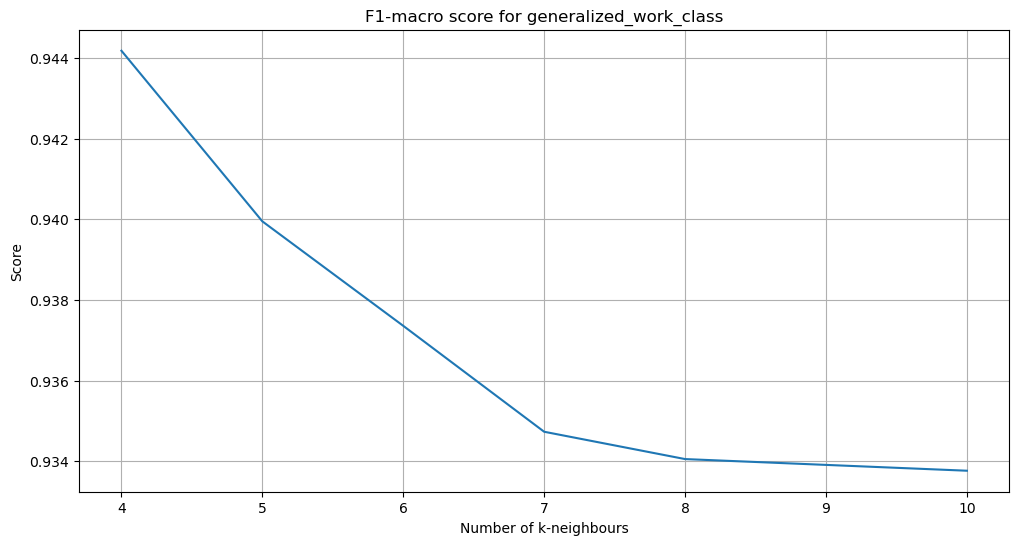

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(ls1_numbers, ls1_scores)
# plt.title('Number of samples in different pairs of generalized_work_class-global_work_class')
plt.title('F1-macro score for generalized_work_class')
plt.xlabel('Number of k-neighbours')
plt.grid()
plt.ylabel('Score')
plt.show()

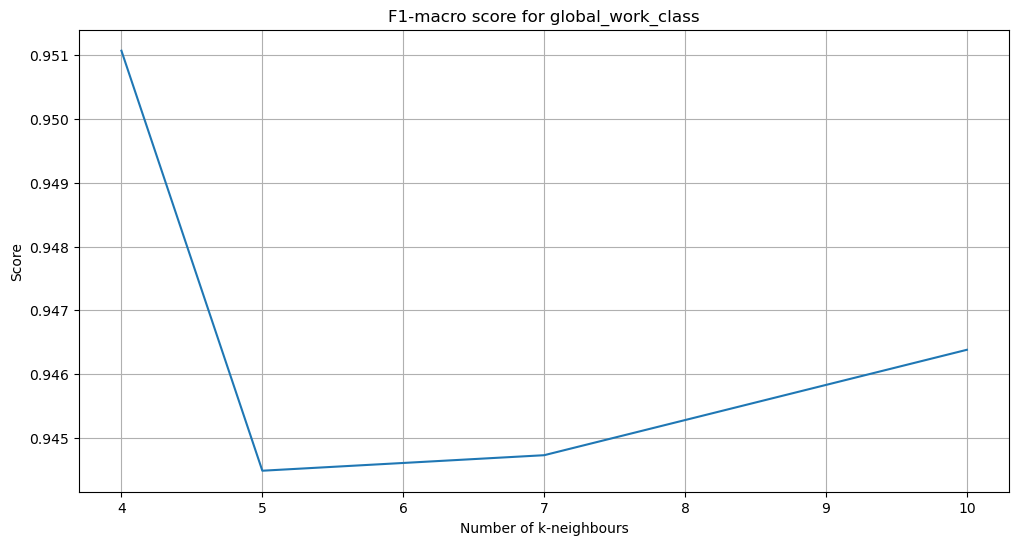

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(ls2_numbers, ls2_scores)
# plt.title('Number of samples in different pairs of generalized_work_class-global_work_class')
plt.title('F1-macro score for global_work_class')
plt.xlabel('Number of k-neighbours')
plt.grid()
plt.ylabel('Score')
plt.show()